In [185]:
import xport
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [186]:
import copy
def read_data(fname):
  df = pd.DataFrame(pd.read_spss(fname), index=None)
  df.head(n=10)
  print(f'Data Shape Raw : {df.shape}')
  data = copy.deepcopy(df)
  df = df[['sex','Age','physicalinactivity','walkforatleast10minutes','Height','Weight','Hisory_DM',
            'HTN','marital_new','BMI_cat','smoke','drink','kchat','fruit','vegetables','fat','salt','History_HTN']]
  print(f'Data Shape Final : {df.shape}')
  return df

In [187]:
data = read_data('Hypertension_dataset.sav')

Data Shape Raw : (612, 151)
Data Shape Final : (612, 18)


In [188]:
data.head(n=10)

,sex,Age,physicalinactivity,walkforatleast10minutes,Height,Weight,Hisory_DM,HTN,marital_new,BMI_cat,smoke,drink,kchat,fruit,vegetables,fat,salt,History_HTN
0,Male,75.0,no,yes,172.0,72.0,yes,no,Married,Normal,no,no,no,yes,yes,yes,no,no
1,Female,31.0,yes,yes,165.0,61.0,no,no,Divorced/Widowed,Normal,no,no,no,no,no,no,no,no
2,Female,35.0,no,yes,160.0,66.0,no,no,Married,Over weight,no,no,no,yes,yes,no,no,no
3,Male,34.0,no,yes,180.0,70.0,no,no,Married,Normal,no,no,no,yes,yes,no,no,no
4,Male,38.0,yes,yes,180.0,67.0,no,no,Married,Normal,no,no,no,yes,yes,yes,no,no
5,Female,38.0,no,yes,170.0,65.0,no,no,Married,Normal,no,no,no,yes,yes,no,no,no
6,Female,38.0,yes,yes,170.0,72.0,no,no,Married,Normal,no,no,yes,yes,yes,yes,no,no
7,Male,31.0,yes,yes,161.0,62.0,no,no,Married,Normal,no,no,no,yes,yes,yes,no,yes
8,Female,38.0,yes,yes,164.0,70.0,no,no,Married,Over weight,no,no,no,no,yes,yes,no,no
9,Female,34.0,no,yes,182.0,63.0,no,no,Married,Normal,no,no,no,yes,yes,no,no,no


In [189]:
def split_input_output(data, target_col):
  output_data = data[target_col]
  input_data = data.drop(target_col, axis=1)
  print(f'X shape : {input_data.shape}')
  print(f'y shape : {output_data.shape}')
  return input_data, output_data

In [190]:
X, y = split_input_output(data=data,
                          target_col='HTN')

X shape : (612, 17)
y shape : (612,)


In [191]:
from sklearn.model_selection import train_test_split
def split_train_test(X, y, test_size_int):
  X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size=test_size_int, 
                                                                random_state=123, stratify=y)
  print(f'X train shape : {X_train.shape}')
  print(f'y train shape : {y_train.shape}')
  print(f'X test shape : {X_not_train.shape}')
  print(f'y test shape : {y_not_train.shape}')
  print()
  return X_train, X_not_train, y_train, y_not_train

In [192]:
print(y.groupby(y).count())

HTN
no     482
yes    130
Name: HTN, dtype: int64


In [193]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, 0.2)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, 0.5)

X train shape : (489, 17)
y train shape : (489,)
X test shape : (123, 17)
y test shape : (123,)

X train shape : (61, 17)
y train shape : (61,)
X test shape : (62, 17)
y test shape : (62,)



In [194]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7990196078431373
0.09967320261437909
0.10130718954248366


In [195]:
X_train.head()  # (JUST RUN THE CODE)

,sex,Age,physicalinactivity,walkforatleast10minutes,Height,Weight,Hisory_DM,marital_new,BMI_cat,smoke,drink,kchat,fruit,vegetables,fat,salt,History_HTN
520,Male,63.0,yes,no,178.0,58.0,no,Married,Under weight,no,no,no,no,yes,no,no,no
492,Male,35.0,yes,no,156.0,65.0,no,Married,Over weight,no,no,no,yes,yes,no,no,no
279,Male,32.0,no,yes,170.0,64.0,no,Single,Normal,no,no,no,yes,yes,no,no,no
391,Male,53.0,no,yes,150.0,61.0,no,Married,Over weight,no,no,no,no,yes,no,no,yes
355,Male,34.0,yes,yes,150.0,60.0,no,Married,Over weight,no,no,no,no,yes,yes,no,no


In [196]:
####################################################
# Create a function to split numerical & categorical input
# - you have three parameters
#   - data, an input data (pd. Dataframe)
#   - num_cols, a list of numerical columns (list)
#   - cat_cols, a list of categorical columns (list)
# - and write a validation that you perform right operation
# - and return two dataframe, numerical & categorical data
# Write your code here
####################################################
def num_cat_splitter(data, num_columns, cat_columns):
  data_train_num = data[num_columns]
  print(f'Data num shape: {data_train_num.shape}')
  data_train_cat = data[cat_columns]
  print(f'Data cat shape: {data_train_cat.shape}')
  return data_train_num, data_train_cat

In [197]:
# Split the data
cat_columns = X_train.select_dtypes(exclude=[np.number]).columns
num_columns = X_train.select_dtypes(include=[np.number]).columns
X_train_num, X_train_cat = num_cat_splitter(X_train, num_columns, cat_columns)

Data num shape: (489, 3)
Data cat shape: (489, 14)


In [198]:
X_train_cat.head(n=10)

,sex,physicalinactivity,walkforatleast10minutes,Hisory_DM,marital_new,BMI_cat,smoke,drink,kchat,fruit,vegetables,fat,salt,History_HTN
520,Male,yes,no,no,Married,Under weight,no,no,no,no,yes,no,no,no
492,Male,yes,no,no,Married,Over weight,no,no,no,yes,yes,no,no,no
279,Male,no,yes,no,Single,Normal,no,no,no,yes,yes,no,no,no
391,Male,no,yes,no,Married,Over weight,no,no,no,no,yes,no,no,yes
355,Male,yes,yes,no,Married,Over weight,no,no,no,no,yes,yes,no,no
38,Female,yes,yes,no,Married,Normal,no,no,no,no,yes,no,no,no
417,Female,no,yes,no,Married,Normal,no,no,no,yes,yes,no,no,no
610,Female,no,yes,yes,Married,Normal,no,no,no,yes,yes,yes,no,yes
135,Male,no,yes,no,Married,Normal,no,yes,no,yes,yes,no,no,no
284,Female,yes,no,no,Married,Normal,no,no,no,no,yes,no,no,no


In [199]:
X_train_num.head(n=10)

,Age,Height,Weight
520,63.0,178.0,58.0
492,35.0,156.0,65.0
279,32.0,170.0,64.0
391,53.0,150.0,61.0
355,34.0,150.0,60.0
38,38.0,150.0,50.0
417,42.0,155.0,56.0
610,36.0,185.0,82.0
135,54.0,160.0,62.0
284,56.0,154.0,50.0


In [200]:
100 * (X_train.isna().sum(0) / len(X_train))

sex                        0.0
Age                        0.0
physicalinactivity         0.0
walkforatleast10minutes    0.0
Height                     0.0
Weight                     0.0
Hisory_DM                  0.0
marital_new                0.0
BMI_cat                    0.0
smoke                      0.0
drink                      0.0
kchat                      0.0
fruit                      0.0
vegetables                 0.0
fat                        0.0
salt                       0.0
History_HTN                0.0
dtype: float64

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

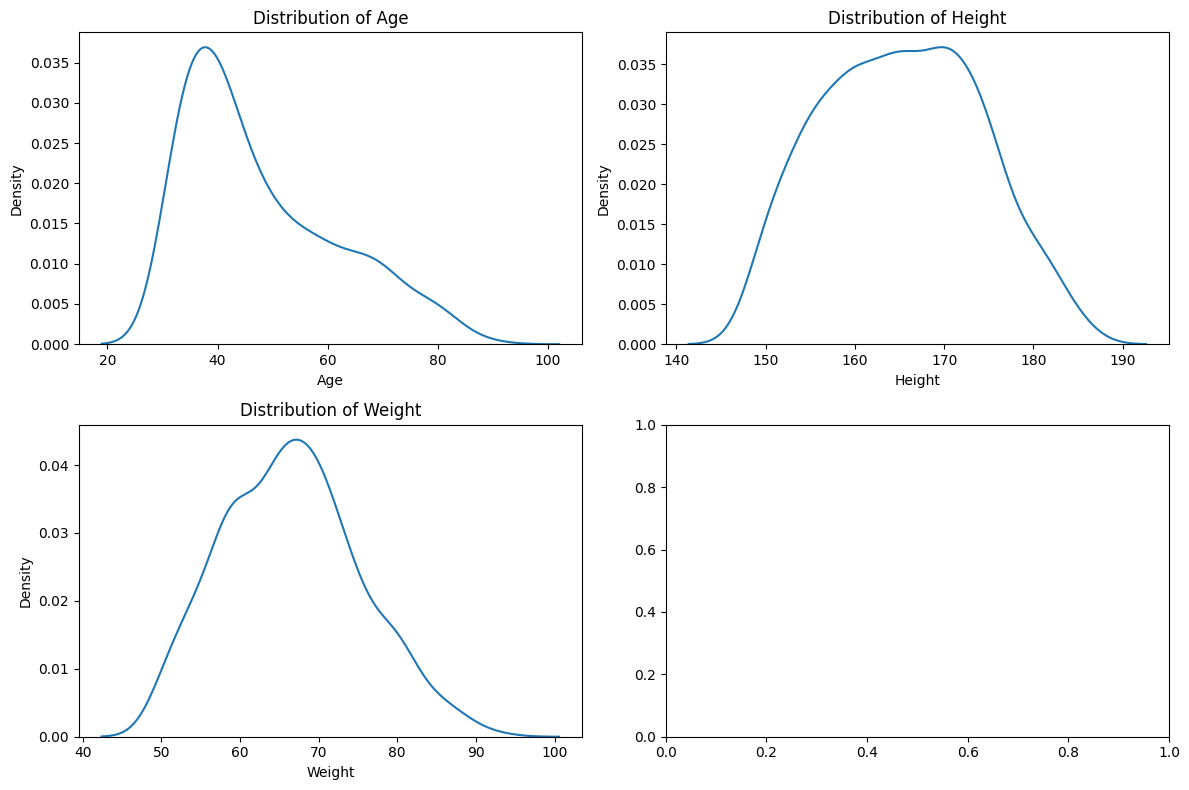

In [202]:
# Plot histogram
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [203]:
X_train_num.describe()

,Age,Height,Weight
count,489.000000,489.000000,489.000000
mean,47.905930,165.271984,66.533333
std,13.855939,8.754955,8.722691
min,31.000000,149.000000,50.000000
25%,37.000000,158.000000,60.000000
50%,43.000000,165.000000,66.000000
75%,57.000000,172.000000,72.000000
max,90.000000,185.000000,93.000000


In [204]:
print(f'Data X train num  : ', X_train_num.shape)
print(f'Data X train cat  : ', X_train_cat.shape)
print(f'Data y train  : ', y_train.shape)

Data X train num  :  (489, 3)
Data X train cat  :  (489, 14)
Data y train  :  (489,)


In [205]:
X_train_num.isna().sum(0)

Age       0
Height    0
Weight    0
dtype: int64

In [206]:
# X_train_cat = X_train_cat.applymap(lambda x: x.strip() if isinstance(x, str) else x)
X_train_cat.value_counts(normalize=True)

sex     physicalinactivity  walkforatleast10minutes  Hisory_DM  marital_new  BMI_cat       smoke  drink  kchat  fruit  vegetables  fat  salt  History_HTN
Female  yes                 yes                      no         Married      Normal        no     no     no     yes    yes         no   no    no             0.049080
Male    yes                 yes                      no         Married      Normal        no     no     no     yes    yes         no   no    no             0.036810
        no                  yes                      no         Married      Normal        no     no     no     yes    yes         no   no    no             0.034765
Female  no                  yes                      no         Married      Normal        no     no     no     yes    yes         no   no    no             0.020450
Male    yes                 yes                      no         Married      Normal        no     no     no     yes    yes         yes  no    no             0.018405
                

In [207]:
X_train_cat['BMI_cat'].value_counts(normalize=True)

Normal          0.607362
Over weight     0.341513
Obese           0.038855
Under weight    0.012270
Name: BMI_cat, dtype: float64

In [208]:
from sklearn.preprocessing import OneHotEncoder as ohe
def cat_encoder_fit_transform(encoder, cat_data_train, cat_columns):
    return pd.DataFrame(encoder.fit_transform(cat_data_train), columns=cat_columns)

In [209]:
# Initialize encoders
from sklearn.preprocessing import LabelEncoder

def cat_encoder(data_cat):
    data_cat_bmi_enc = data_cat[['BMI_cat']]
    data_cat_marital_enc = data_cat[['marital_new']]

    # Transform
    data_cat_bmi_encoded = cat_encoder_fit_transform(ohe(sparse_output=False), data_cat_bmi_enc, ['Normal', 'Under weight', 'Obese', 'Over weight'])
    data_cat_marital_encoded = cat_encoder_fit_transform(ohe(sparse_output=False), data_cat_marital_enc, ['Single', 'Married', 'Divorced/Widowed'])
    # Encode loan_grade with LabelEncoder
    data_cat_dm_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['Hisory_DM'], cat_columns=['Hisory_DM'])
    data_cat_physic_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['physicalinactivity'], cat_columns=['physicalinactivity'])
    data_cat_sex_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['sex'], cat_columns=['sex'])
    data_cat_walk_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['walkforatleast10minutes'], cat_columns=['walkforatleast10minutes'])
    # Encode cb_person_default_on_file with LabelEncoder
    data_cat_smoke_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['smoke'], cat_columns=['smoke'])
    data_cat_drink_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['drink'], cat_columns=['drink'])
    data_cat_kchat_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['kchat'], cat_columns=['kchat'])
    data_cat_vegetables_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['fruit'], cat_columns=['fruit'])
    data_cat_fat_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['fat'], cat_columns=['fat'])
    data_cat_salt_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['salt'], cat_columns=['salt'])
    data_cat_hist_htn_encoded = cat_encoder_fit_transform(LabelEncoder(), data_cat['History_HTN'], cat_columns=['History_HTN'])


    # # Concatenate encoded dataframes
    data_cat_encoded = pd.concat([data_cat_dm_encoded,data_cat_physic_encoded,data_cat_sex_encoded,data_cat_walk_encoded,
    data_cat_smoke_encoded,data_cat_drink_encoded,data_cat_kchat_encoded,data_cat_vegetables_encoded,data_cat_fat_encoded,
    data_cat_salt_encoded,data_cat_hist_htn_encoded, data_cat_bmi_encoded, data_cat_marital_encoded], axis=1)
    data_cat_encoded.head()
    
    return data_cat_encoded

In [210]:
####################################################
# Create a function to join / concat the data
# The function is called by concat_data
# - It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
# - Don't forget to validate your process
# - It returns the concated data
#
# Write your code here
####################################################
def concat_data(num_data_train, cat_data_train):
    joined_data = pd.concat([num_data_train.reset_index(drop=True), cat_data_train.reset_index(drop=True)], axis=1)
    print(f'Numerical data shape : {num_data_train.shape}')
    print(f'Categorical data shape : {cat_data_train.shape}')
    print(f'Concat data shape : {joined_data.shape}')
    return joined_data

In [211]:
# Concat the data
X_train_cat_encoded = cat_encoder(X_train_cat)
X_train_concat = concat_data(X_train_num, X_train_cat_encoded)

Numerical data shape : (489, 3)
Categorical data shape : (489, 18)
Concat data shape : (489, 21)


In [212]:
# Validate (JUST RUN THE CODE)
X_train_concat.head()

,Age,Height,Weight,Hisory_DM,physicalinactivity,sex,walkforatleast10minutes,smoke,drink,kchat,fruit,fat,salt,History_HTN,Normal,Under weight,Obese,Over weight,Single,Married,Divorced/Widowed
0,63.0,178.0,58.0,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,35.0,156.0,65.0,0,1,1,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32.0,170.0,64.0,0,0,1,1,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53.0,150.0,61.0,0,0,1,1,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,34.0,150.0,60.0,0,1,1,1,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [213]:
#orm data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
from sklearn.preprocessing import StandardScaler
def fit_scaler(data_imputed):
    std = StandardScaler()
    return std.fit(data_imputed)

def transform_scaler(data_imputed, std):
    return pd.DataFrame(std.transform(data_imputed), columns=data_imputed.columns, index=data_imputed.index)

In [214]:
# Fit the scaler
scaler = fit_scaler(X_train_concat)

# Transform the scaler
X_train_clean = transform_scaler(X_train_concat, scaler)

In [215]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,Age,Height,Weight,Hisory_DM,physicalinactivity,sex,walkforatleast10minutes,smoke,drink,kchat,fruit,fat,salt,History_HTN,Normal,Under weight,Obese,Over weight,Single,Married,Divorced/Widowed
count,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000,489.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010
min,-1.2214,-1.8605,-1.8974,-0.2777,-1.2545,-1.1012,-1.7831,-0.3810,-0.5608,-0.4256,-1.5555,-0.6652,-0.3846,-0.3810,-1.2437,-0.2011,-0.7202,-0.1115,-0.3985,-2.0499,-0.2417
25%,-0.7879,-0.8315,-0.7498,-0.2777,-1.2545,-1.1012,0.5608,-0.3810,-0.5608,-0.4256,-1.5555,-0.6652,-0.3846,-0.3810,-1.2437,-0.2011,-0.7202,-0.1115,-0.3985,0.4878,-0.2417
50%,-0.3544,-0.0311,-0.0612,-0.2777,0.7972,0.9081,0.5608,-0.3810,-0.5608,-0.4256,0.6429,-0.6652,-0.3846,-0.3810,0.8040,-0.2011,-0.7202,-0.1115,-0.3985,0.4878,-0.2417
75%,0.6570,0.7693,0.6274,-0.2777,0.7972,0.9081,0.5608,-0.3810,-0.5608,-0.4256,0.6429,1.5033,-0.3846,-0.3810,0.8040,-0.2011,1.3886,-0.1115,-0.3985,0.4878,-0.2417
max,3.0411,2.2557,3.0373,3.6016,0.7972,0.9081,0.5608,2.6243,1.7831,2.3495,0.6429,1.5033,2.6004,2.6243,0.8040,4.9736,1.3886,8.9722,2.5097,0.4878,4.1366


In [216]:
####################################################
def preprocess_data(data_train, num_cols, cat_cols, scaler):
    data_num, data_cat = num_cat_splitter(data_train, num_cols, cat_cols)
    # idx_to_drop = data_num[(data_num['person_age']< data_num['person_emp_length']+16)
    #                         |(data_num['person_age']>67)
    #                         |(data_num['person_age'] <= data_num['cb_person_cred_hist_length']+16)].index.tolist()
    
    # print("Train numerical shape : ", data_num.shape)
    # print("Train categorical shape : ", data_cat.shape)
    
    # data_num = data_num.drop(idx_to_drop)
    # data_cat = data_cat.drop(idx_to_drop)
    
    print("Train numerical shape after  : ", data_num.shape)
    print("Train categorical shape after  : ", data_cat.shape)

    # Concatenate encoded dataframes
    cat_concat_encoded = cat_encoder(data_cat)
    
    print("Train cat encoded concatenated shape : ", cat_concat_encoded.shape)
    
    data_concatenated = concat_data(data_num, cat_concat_encoded)
    print('')
    print('Original data shape:', data_concatenated.shape)

    # Transform the scaler
    clean_data = transform_scaler(data_concatenated, scaler)
    print('Mapped data shape :', data_concatenated.shape,'\n')
    return clean_data

In [217]:
cat_columns = X_train.select_dtypes(exclude=[np.number]).columns
num_columns = X_train.select_dtypes(include=[np.number]).columns
# X_train_clean = preprocess_data(X_train, num_columns, cat_columns, num_imputer, scaler)
X_valid_clean = preprocess_data(X_valid, num_columns, cat_columns, scaler)
X_test_clean = preprocess_data(X_test, num_columns, cat_columns, scaler)

Data num shape: (61, 3)
Data cat shape: (61, 14)
Train numerical shape after  :  (61, 3)
Train categorical shape after  :  (61, 14)
Train cat encoded concatenated shape :  (61, 18)
Numerical data shape : (61, 3)
Categorical data shape : (61, 18)
Concat data shape : (61, 21)

Original data shape: (61, 21)
Mapped data shape : (61, 21) 

Data num shape: (62, 3)
Data cat shape: (62, 14)
Train numerical shape after  :  (62, 3)
Train categorical shape after  :  (62, 14)
Train cat encoded concatenated shape :  (62, 18)
Numerical data shape : (62, 3)
Categorical data shape : (62, 18)
Concat data shape : (62, 21)

Original data shape: (62, 21)
Mapped data shape : (62, 21) 



In [218]:
from sklearn.metrics import mean_squared_error
import numpy as np

def extract_cv_results(cv_obj):
    train_score = abs(cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_])
    valid_score = abs(cv_obj.cv_results_['mean_test_score'][cv_obj.best_index_])
    best_score = abs(cv_obj.best_score_)
    best_params = cv_obj.best_params_
    return train_score, valid_score, best_score, best_params

In [219]:
####################################################
# Import sklearn library of those six models + gridsearchcv
# Write your code here
# This is 1 pts
####################################################
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [220]:
####################################################
# Perform GridSearchCV for Baseline model
# return the results as reg_base
# Write your code here
####################################################
# Define your model and parameter grid
# def dummy_model(X_train_clean, y_train, X_valid_clean):
model = DummyClassifier(strategy="stratified", random_state=123)
param_grid = {}

model.fit(X_train_clean, y_train)
y_pred = model.predict(X_valid_clean)
# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring="f1_weighted", return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_base
reg_base = grid_search
# Validate the CV Score (JUST RUN THE CODE)
train_base, valid_base, best_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base*100:.2f}%')
print(f'Valid score - Baseline model: {valid_base*100:.2f}%')
print(f'Best score - Baseline model: {best_base*100:.2f}%')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 66.60%
Valid score - Baseline model: 66.96%
Best score - Baseline model: 66.96%
Best Params - Baseline model: {}


In [221]:
# # Validate the CV Score (JUST RUN THE CODE)
# train_base, valid_base, best_base, best_param_base = extract_cv_results(reg_base)

# print(f'Train score - Baseline model: {train_base*100:.2f}%')
# print(f'Valid score - Baseline model: {valid_base*100:.2f}%')
# print(f'Best score - Baseline model: {best_base*100:.2f}%')
# print(f'Best Params - Baseline model: {best_param_base}')

In [222]:
####################################################
# Perform GridSearchCV for kNN model
# return the results as reg_knn
# Write your code here
####################################################
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring="f1_weighted", return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_base
reg_knn = grid_search  

In [223]:
# Validate the CV Score (JUST RUN THE CODE)
train_knn, valid_knn, best_knn, best_param_knn = extract_cv_results(reg_knn)

print(f'Train score - kNN model: {train_knn*100:.2f}%')
print(f'Valid score - kNN model: {valid_knn*100:.2f}%')
print(f'Best score - kNN model: {best_knn*100:.2f}%')
print(f'Best Params - kNN model: {best_param_knn}')

Train score - kNN model: 100.00%
Valid score - kNN model: 80.50%
Best score - kNN model: 80.50%
Best Params - kNN model: {'n_neighbors': 1}


In [224]:
####################################################
# Perform GridSearchCV for SGD Classifier model
# return the results as reg_sgd
# Write your code here
####################################################
model = SGDClassifier(random_state=123)
param_grid = {}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring="f1_weighted", return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_sgd
reg_sgd = grid_search  

In [225]:
# Validate the CV Score (JUST RUN THE CODE)
train_sgd, valid_sgd, best_sgd, best_param_sgd = extract_cv_results(reg_sgd)

print(f'Train score - SGD Classifier model: {train_sgd*100:.2f}%')
print(f'Valid score - SGD Classifier model: {valid_sgd*100:.2f}%')
print(f'Best score - SGD Classifier model: {best_sgd*100:.2f}%')
print(f'Best Params - SGD Classifier model: {best_param_sgd}')

Train score - SGD Classifier model: 82.74%
Valid score - SGD Classifier model: 80.75%
Best score - SGD Classifier model: 80.75%
Best Params - SGD Classifier model: {}


In [226]:
####################################################
# Perform GridSearchCV for Decision Tree model
# return the results as reg_dt
# Write your code here
####################################################
model = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss'], 'max_features': [None],'max_depth': [10], 
              'min_samples_leaf': [2], 'min_samples_split': [50]}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring="f1_weighted", return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_dt
reg_dt = grid_search  

In [227]:
# Validate the CV Score (JUST RUN THE CODE)
train_dt, valid_dt, best_dt, best_param_dt = extract_cv_results(reg_dt)

print(f'Train score - Decision Tree model: {train_dt*100:.2f}%')
print(f'Valid score - Decision Tree model: {valid_dt*100:.2f}%')
print(f'Best score - Decision Tree model: {best_dt*100:.2f}%')
print(f'Best Params - Decision Tree model: {best_param_dt}')

Train score - Decision Tree model: 84.90%
Valid score - Decision Tree model: 80.06%
Best score - Decision Tree model: 80.06%
Best Params - Decision Tree model: {'criterion': 'log_loss', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 50}


In [228]:
####################################################
# Perform GridSearchCV for Ridge model
# return the results as reg_ridge
# Write your code here
####################################################
model = RidgeClassifier(random_state=123)
param_grid = {'alpha': [10**-6,10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3, 10**4,10**5, 10**6, 10**7, 10**8, 10**9,10**10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring="f1_weighted", return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_ridge
reg_ridge = grid_search  

In [229]:
# Validate the CV Score (JUST RUN THE CODE)
train_ridge, valid_ridge, best_ridge, best_param_ridge = extract_cv_results(reg_ridge)

print(f'Train score - Ridge model: {train_ridge*100:.2f}%')
print(f'Valid score - Ridge model: {valid_ridge*100:.2f}%')
print(f'Best score - Ridge model: {best_ridge*100:.2f}%')
print(f'Best Params - Ridge model: {best_param_ridge}')

Train score - Ridge model: 86.11%
Valid score - Ridge model: 85.06%
Best score - Ridge model: 85.06%
Best Params - Ridge model: {'alpha': 1e-06}


In [230]:
####################################################
# Perform GridSearchCV for Random Forest model
# return the results as reg_rf
# Write your code here
####################################################
model = RandomForestClassifier(random_state=123)
param_grid = {'criterion': ['log_loss'], 'max_features': [None], 'max_depth': [None], 
              'min_samples_leaf': [2], 'min_samples_split': [2]}

# Initialize GridSearchCV 
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1_weighted', return_train_score=True)
  
# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_rf
reg_rf = grid_search  

In [231]:
# Validate the CV Score (JUST RUN THE CODE)
train_rf, valid_rf, best_rf, best_param_rf = extract_cv_results(reg_rf)
 
print(f'Train score - Random Forest model: {train_rf*100:.2f}%')
print(f'Valid score - Random Forest model: {valid_rf*100:.2f}%')
print(f'Best score - Random Forest model: {best_rf*100:.2f}%')
print(f'Best Params - Random Forest model: {best_param_rf}')

Train score - Random Forest model: 98.25%
Valid score - Random Forest model: 83.37%
Best score - Random Forest model: 83.37%
Best Params - Random Forest model: {'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [232]:
####################################################
# Perform GridSearchCV for Adaboost model
# return the results as reg_ada
# Write your code here
####################################################
model = AdaBoostClassifier()
param_grid = {'n_estimators': [150],
              'algorithm': ['SAMME'], 
              'estimator': [DecisionTreeClassifier(criterion='log_loss', max_depth= 10, max_features= None, min_samples_leaf= 2, min_samples_split= 50)],
              'learning_rate': [1]
              }

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1_weighted', return_train_score=True)
 
# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_ada
reg_ada = grid_search  

In [233]:
# Validate the CV Score (JUST RUN THE CODE)
train_ada, valid_ada, best_ada, best_param_ada = extract_cv_results(reg_ada)

print(f'Train score - AdaBoost model: {train_ada*100:.2f}%')
print(f'Valid score - AdaBoost model: {valid_ada*100:.2f}%')
print(f'Best score - AdaBoost model: {best_ada*100:.2f}%')
print(f'Best Params - AdaBoost model: {best_param_ada}')

Train score - AdaBoost model: 100.00%
Valid score - AdaBoost model: 83.93%
Best score - AdaBoost model: 83.93%
Best Params - AdaBoost model: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=2,
                       min_samples_split=50), 'learning_rate': 1, 'n_estimators': 150}


In [234]:
# Summarize (JUST RUN THE CODE)
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'kNN', 'SGD', 'Decision Tree', 'Ridge', 'Random Forest', 'Ada Boost'],
        'train_score': [train_base, train_knn, train_sgd, train_dt, train_ridge, train_rf, train_ada],
        'valid_score': [valid_base, valid_knn, valid_sgd, valid_dt, valid_ridge, valid_rf, valid_ada],
        'best_params': [best_param_base, best_param_knn, best_param_sgd, best_param_dt, best_param_ridge, best_param_rf, best_param_ada]
    }
)

summary_df['train_score'] 
summary_df['valid_score']
summary_df

,model,train_score,valid_score,best_params
0,Baseline,0.666031,0.669645,{}
1,kNN,1.000000,0.805019,{'n_neighbors': 1}
2,SGD,0.827356,0.807540,{}
3,Decision Tree,0.848963,0.800613,"{'criterion': 'log_loss', 'max_depth': 10, 'ma..."
4,Ridge,0.861128,0.850566,{'alpha': 1e-06}
5,Random Forest,0.982471,0.833656,"{'criterion': 'log_loss', 'max_depth': None, '..."
6,Ada Boost,1.000000,0.839300,"{'algorithm': 'SAMME', 'estimator': DecisionTr..."


In [235]:
model = RidgeClassifier(random_state=123)
param_grid = {'alpha': [10**-6,10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 
                        10**3, 10**4,10**5, 10**6, 10**7, 10**8, 10**9,10**10]}

# Initialize GridSearchCV 
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1_weighted', return_train_score=True)
  
# Fit GridSearchCV
grid_search.fit(X_train_clean, y_train)

# Assign the fitted GridSearchCV object to reg_best
reg_best = grid_search  

# Validate the CV Score (JUST RUN THE CODE)
train_best, valid_best, best_score, best_param_best = extract_cv_results(reg_best)
 
print(f'Train score - Ridge model: {train_best*100:.2f}%')
print(f'Valid score - Ridge model: {valid_best*100:.2f}%')
print(f'Best score - Ridge model: {best_score*100:.2f}%')
print(f'Best Params - Ridge model: {best_param_best}')

Train score - Ridge model: 86.11%
Valid score - Ridge model: 85.06%
Best score - Ridge model: 85.06%
Best Params - Ridge model: {'alpha': 1e-06}


In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train_pred = reg_best.predict(X_train_clean)

print(pd.DataFrame(confusion_matrix(y_true = y_train, y_pred = X_train_pred)))

     0   1
0  373  12
1   52  52


In [237]:
print(classification_report(y_true=y_train, y_pred=X_train_pred, target_names=["HTN Diagnosed", "Non HTN Diagnosed"]))

                   precision    recall  f1-score   support

    HTN Diagnosed       0.88      0.97      0.92       385
Non HTN Diagnosed       0.81      0.50      0.62       104

         accuracy                           0.87       489
        macro avg       0.85      0.73      0.77       489
     weighted avg       0.86      0.87      0.86       489



In [238]:
X_valid_pred = reg_best.predict(X_valid_clean)

print(pd.DataFrame(confusion_matrix(y_true = y_valid, y_pred = X_valid_pred)))

    0  1
0  46  2
1   7  6


In [239]:
print(classification_report(y_true=y_valid, y_pred=X_valid_pred, target_names=["HTN Diagnosed", "Non HTN Diagnosed"]))

                   precision    recall  f1-score   support

    HTN Diagnosed       0.87      0.96      0.91        48
Non HTN Diagnosed       0.75      0.46      0.57        13

         accuracy                           0.85        61
        macro avg       0.81      0.71      0.74        61
     weighted avg       0.84      0.85      0.84        61



In [240]:
X_test_pred = reg_best.predict(X_test_clean)

print(pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = X_test_pred)))

    0  1
0  44  5
1   6  7


In [241]:
print(classification_report(y_true=y_test, y_pred=X_test_pred, target_names=["HTN Diagnosed", "Non HTN Diagnosed"]))

                   precision    recall  f1-score   support

    HTN Diagnosed       0.88      0.90      0.89        49
Non HTN Diagnosed       0.58      0.54      0.56        13

         accuracy                           0.82        62
        macro avg       0.73      0.72      0.72        62
     weighted avg       0.82      0.82      0.82        62

